In [ ]:
# Insira seu project token aqui

# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - TNT

<hr>

## Installing Libs

In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
!pip install xgboost --upgrade

In [ ]:
!pip install imblearn --upgrade

In [ ]:
!pip install pycaret

In [ ]:
!pip install tpot

<hr>

## Download dos conjuntos de dados em formato .csv

In [1]:
import pandas as pd

In [2]:
df_data_1 = pd.read_csv(r'd7_public_iotdadosdate.csv')
df_data_1.columns = ['row', 'Tempo' , 'Estação', 'LAT', 'LONG', 'Movimentação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego', 'TARGET']

In [3]:
df_training_dataset = df_data_1
df_training_dataset.tail()

,row,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
17011,17012,2019-12-30 00:00:00.000000,Hospital São Paulo,-23.5984,-46.6455,25702,53,54,26,38,23,25,11,37,NORMAL
17012,17013,2019-12-31 00:00:00.000000,Hospital São Paulo,-23.5984,-46.6455,26236,43,52,17,33,18,21,5,35,REABASTECER
17013,17014,2020-01-01 00:00:00.000000,Hospital São Paulo,-23.5984,-46.6455,27174,34,50,9,28,15,16,43,32,NORMAL
17014,17015,2020-01-02 00:00:00.000000,Hospital São Paulo,-23.5984,-46.6455,26877,22,47,65,27,11,16,39,30,NORMAL
17015,17016,2020-01-03 00:00:00.000000,Hospital São Paulo,-23.5984,-46.6455,26759,9,42,56,22,8,10,35,26,NORMAL


Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os usuários do app do BanCoppel:

**Tempo**

**Estação**

**LAT**

**LONG**

**Movimentação**

**Original_473**

**Original_269**

**Zero**

**Maçã-Verde**

**Tangerina**

**Citrus**

**Açaí-Guaraná**

**Pêssego**

**TARGET**

In [4]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17016 entries, 0 to 17015
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row           17016 non-null  int64  
 1   Tempo         17016 non-null  object 
 2   Estação       17016 non-null  object 
 3   LAT           17016 non-null  float64
 4   LONG          17016 non-null  float64
 5   Movimentação  17016 non-null  int64  
 6   Original_473  17016 non-null  int64  
 7   Original_269  17016 non-null  int64  
 8   Zero          17016 non-null  int64  
 9   Maçã-Verde    17016 non-null  int64  
 10  Tangerina     17016 non-null  int64  
 11  Citrus        17016 non-null  int64  
 12  Açaí-Guaraná  17016 non-null  int64  
 13  Pêssego       17016 non-null  int64  
 14  TARGET        17016 non-null  object 
dtypes: float64(2), int64(10), object(3)
memory usage: 1.9+ MB


In [5]:
df_training_dataset.nunique()

row             17016
Tempo             719
Estação            25
LAT                25
LONG               25
Movimentação    14873
Original_473       81
Original_269       65
Zero               63
Maçã-Verde         43
Tangerina          42
Citrus             43
Açaí-Guaraná       42
Pêssego            42
TARGET              2
dtype: int64

<hr>

## Detalhamento do desafio: classificação binária

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de aplicativo de um banco. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``TARGET``

<hr>

In [6]:
#df_training_dataset['Temponovo'] = df_training_dataset.Tempo.values.astype(np.int64) // 10 ** 9
#pd.to_numeric(s)
#criando uma cópia do dataset original 
dados = df_training_dataset.copy()
dados.head()
dados = dados.drop_duplicates(subset=['row']).copy()
sabores = ['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego']
#incluindo uma coluna com a média de latas por máquina
dados['Media'] = dados[sabores].mean(axis=1)
#incluindo uma coluna com a mediana de latas por máquina
dados['Mediana'] = dados[sabores].median(axis=1)
df_training_dataset = dados

In [7]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17016 entries, 0 to 17015
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row           17016 non-null  int64  
 1   Tempo         17016 non-null  object 
 2   Estação       17016 non-null  object 
 3   LAT           17016 non-null  float64
 4   LONG          17016 non-null  float64
 5   Movimentação  17016 non-null  int64  
 6   Original_473  17016 non-null  int64  
 7   Original_269  17016 non-null  int64  
 8   Zero          17016 non-null  int64  
 9   Maçã-Verde    17016 non-null  int64  
 10  Tangerina     17016 non-null  int64  
 11  Citrus        17016 non-null  int64  
 12  Açaí-Guaraná  17016 non-null  int64  
 13  Pêssego       17016 non-null  int64  
 14  TARGET        17016 non-null  object 
 15  Media         17016 non-null  float64
 16  Mediana       17016 non-null  float64
dtypes: float64(4), int64(10), object(3)
memory usage: 2.3+ MB


## Pre-processando o dataset antes do treinamento

### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [8]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [9]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

row             0
Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
Media           0
Mediana         0
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

row             0
Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
Media           0
Mediana         0
dtype: int64



### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [10]:
df_training_dataset_imputed.tail()

,row,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,Media,Mediana
17011,17012,2019-12-30 00:00:00.000000,Hospital São Paulo,-23.5984,-46.6455,25702,53,54,26,38,23,25,11,37,NORMAL,33.375,31.5
17012,17013,2019-12-31 00:00:00.000000,Hospital São Paulo,-23.5984,-46.6455,26236,43,52,17,33,18,21,5,35,REABASTECER,28.000,27.0
17013,17014,2020-01-01 00:00:00.000000,Hospital São Paulo,-23.5984,-46.6455,27174,34,50,9,28,15,16,43,32,NORMAL,28.375,30.0
17014,17015,2020-01-02 00:00:00.000000,Hospital São Paulo,-23.5984,-46.6455,26877,22,47,65,27,11,16,39,30,NORMAL,32.125,28.5
17015,17016,2020-01-03 00:00:00.000000,Hospital São Paulo,-23.5984,-46.6455,26759,9,42,56,22,8,10,35,26,NORMAL,26.000,24.0


# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [87]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''

from datetime import datetime
#df_training = df_training.drop_duplicates(subset=['row']).copy()
df_training = df_training_dataset_imputed
df_training['data'] = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in df_training['Tempo']]
df_training["weekday"] = [t.weekday() for t in df_training["data"]]

df_training = pd.get_dummies(df_training, columns=['Estação'])
df_training.tail()



,row,Tempo,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,...,Estação_Paraíso,Estação_Pinheiros,Estação_República,Estação_São Joaquim,Estação_São Judas,Estação_Sé,Estação_Tamanduateí,Estação_Tatuapé,Estação_Trianon-Masp,Estação_Vila Mariana
17011,17012,2019-12-30 00:00:00.000000,-23.5984,-46.6455,25702,53,54,26,38,23,...,0,0,0,0,0,0,0,0,0,0
17012,17013,2019-12-31 00:00:00.000000,-23.5984,-46.6455,26236,43,52,17,33,18,...,0,0,0,0,0,0,0,0,0,0
17013,17014,2020-01-01 00:00:00.000000,-23.5984,-46.6455,27174,34,50,9,28,15,...,0,0,0,0,0,0,0,0,0,0
17014,17015,2020-01-02 00:00:00.000000,-23.5984,-46.6455,26877,22,47,65,27,11,...,0,0,0,0,0,0,0,0,0,0
17015,17016,2020-01-03 00:00:00.000000,-23.5984,-46.6455,26759,9,42,56,22,8,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['row', "LAT", "LONG", 'Estação', 'Tempo', 'Media', 'Mediana', 'Movimentação', 'data'], inplace=False)

In [13]:
df_training_dataset_rmcolumns.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,weekday
17011,53,54,26,38,23,25,11,37,NORMAL,0
17012,43,52,17,33,18,21,5,35,REABASTECER,1
17013,34,50,9,28,15,16,43,32,NORMAL,2
17014,22,47,65,27,11,16,39,30,NORMAL,3
17015,9,42,56,22,8,10,35,26,NORMAL,4


In [14]:
#convertendo as colunas de object para string
##

# Atenção!

A coluna **TARGET** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

## Treinando um classificador com base em uma árvore de decisão

### Selecionando FEATURES e definindo a variável TARGET

In [88]:
df_training.columns

Index(['row', 'Tempo', 'LAT', 'LONG', 'Movimentação', 'Original_473',
       'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus',
       'Açaí-Guaraná', 'Pêssego', 'TARGET', 'Media', 'Mediana', 'data',
       'weekday', 'Estação_Ana Rosa', 'Estação_Barra Funda',
       'Estação_Brigadeiro', 'Estação_Brooklin', 'Estação_Brás',
       'Estação_Butantã', 'Estação_Campo Belo', 'Estação_Consolação',
       'Estação_Eucaliptos', 'Estação_Faria Lima', 'Estação_Fradique Coutinho',
       'Estação_Higienópolis-Mackenzie', 'Estação_Hospital São Paulo',
       'Estação_Luz', 'Estação_Moema', 'Estação_Paraíso', 'Estação_Pinheiros',
       'Estação_República', 'Estação_São Joaquim', 'Estação_São Judas',
       'Estação_Sé', 'Estação_Tamanduateí', 'Estação_Tatuapé',
       'Estação_Trianon-Masp', 'Estação_Vila Mariana'],
      dtype='object')

In [258]:
features = df_training[
    [
     # 'LAT',
      #  'LONG',
        #'Tempo',
       # 'Movimentação',
        'Original_473', 'Original_269', 'Zero', 
        'Maçã-Verde', 
        'Tangerina',
       'Citrus', 
        'Açaí-Guaraná',
        'Pêssego'
      #  , 'Media'
        #,'data'
       , 'weekday'
       # , 'Mediana'
     ,   'Estação_Hospital São Paulo',
        'Estação_Moema',

    ]
]
target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

In [120]:
from sklearn.feature_selection import RFECV

#feature selection
selector = RFECV(estimator = xgb.XGBClassifier(learning_rate=0.001, max_depth=9, min_child_weight=11, n_estimators=100, nthread=1, subsample=0.4))

In [91]:
numericos = df_training.select_dtypes(include='number')
#numericos = numericos.drop(['row'], axis=1)
selector.fit(features, target)

RFECV(estimator=XGBClassifier(base_score=None, booster=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, gamma=None, gpu_id=None,
                              importance_type='gain',
                              interaction_constraints=None, learning_rate=0.001,
                              max_delta_step=None, max_depth=9,
                              min_child_weight=11, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, nthread=1, num_parallel_tree=None,
                              random_state=None, reg_alpha=None,
                              reg_lambda=None, scale_pos_weight=None,
                              subsample=0.4, tree_method=None,
                              validate_parameters=None, verbosity=None))

In [92]:
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [26]:
colunas = pd.DataFrame({'coluna':numericos.columns,
              'bool': selector.support_})
rfe_features = list(colunas.query('bool == True').coluna.values)
rfe_features

ValueError: arrays must all be same length

In [24]:
from pycaret.classification import *
ml_setup = setup(data=df_training, target='TARGET', train_size=0.8, session_id=1234,                
                 )

Setup Succesfully Completed!


,Description,Value
0,session_id,1234
1,Target Type,Binary
2,Label Encoded,"NORMAL: 0, REABASTECER: 1"
3,Original Data,"(17016, 19)"
4,Missing Values,False
5,Numeric Features,14
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [25]:
compare_models(fold=10,exclude=['svm','qda','lda'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Light Gradient Boosting Machine,0.7651,0.8403,0.8154,0.6007,0.6916,0.5090,0.5247,0.4392
1,CatBoost Classifier,0.7580,0.8410,0.7390,0.6025,0.6637,0.4778,0.4840,25.0113
2,Extreme Gradient Boosting,0.7444,0.8392,0.6532,0.5952,0.6226,0.4301,0.4314,2.1867
3,Decision Tree Classifier,0.7418,0.7018,0.5887,0.6028,0.5954,0.4059,0.4061,0.3267
4,Gradient Boosting Classifier,0.7254,0.8417,0.4316,0.6055,0.5036,0.3212,0.3302,5.9907
5,Random Forest Classifier,0.7228,0.8261,0.4582,0.5927,0.5163,0.3266,0.3322,0.2480
6,Ada Boost Classifier,0.7092,0.8365,0.3070,0.5972,0.4053,0.2383,0.2615,2.0419
7,Extra Trees Classifier,0.6890,0.7588,0.1787,0.5594,0.2706,0.1353,0.1712,1.4627
8,Logistic Regression,0.6820,0.6665,0.1580,0.5281,0.2418,0.1100,0.1425,0.4989
9,Ridge Classifier,0.6787,0.0000,0.1392,0.5100,0.2183,0.0929,0.1241,0.0965


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1234, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
from tpot import TPOTClassifier
from tpot import TPOTRegressor

tpot = TPOTClassifier(generations=5,verbosity=2)

tpot.fit(df_training[rfe_features], df_training['TARGET'])

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [259]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.001, random_state=133)

In [260]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

### Treinando uma árvore de decisão

In [261]:
# Método para criar um árvore de decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMModel,LGBMClassifier
from sklearn.preprocessing import RobustScaler
import xgboost as xgb
#dtc = xgb.XGBClassifier(learning_rate=0.005,  
       #               n_estimators=1000, 
       #               max_depth=50, 
      #                gamma=10).fit(X_train_SMOTE, y_train_SMOTE)
#dtc = RandomForestClassifier(n_jobs=250, random_state=0).fit(X_train, y_train)
#dtc = ExtraTreesClassifier(n_estimators=250, random_state=0).fit(X_train_SMOTE, y_train_SMOTE)
#dtc = DecisionTreeClassifier(max_depth=15).fit(X_train, y_train)
#dtc =LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
#               importance_type='split', learning_rate=0.1, max_depth=-1,
#               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
#               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
#               random_state=1234, reg_alpha=0.0, reg_lambda=0.0, silent=True,
#               subsample=1.0, subsample_for_bin=200000, subsample_freq=0).fit(X_train_SMOTE,y_train_SMOTE)
#dtc = xgb.XGBClassifier(learning_rate=0.001, max_depth=10, min_child_weight=15, n_estimators=100, nthread=1, subsample=0.3).fit(X_train_SMOTE,y_train_SMOTE)
dtc = xgb.XGBClassifier(learning_rate=0.001, max_depth=9, min_child_weight=9, n_estimators=100, nthread=1, subsample=0.4).fit(X_train_SMOTE,y_train_SMOTE)

### Fazendo previsões na amostra de teste

In [262]:
y_pred = dtc.predict(X_test)
print(y_pred)

['NORMAL' 'REABASTECER' 'NORMAL' 'REABASTECER' 'REABASTECER' 'REABASTECER'
 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'REABASTECER' 'REABASTECER' 'NORMAL'
 'NORMAL' 'NORMAL' 'REABASTECER' 'REABASTECER' 'NORMAL']


### Analisando a qualidade do modelo através da matriz de confusão

In [263]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [264]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      NORMAL       1.00      0.83      0.91        12
 REABASTECER       0.75      1.00      0.86         6

    accuracy                           0.89        18
   macro avg       0.88      0.92      0.88        18
weighted avg       0.92      0.89      0.89        18



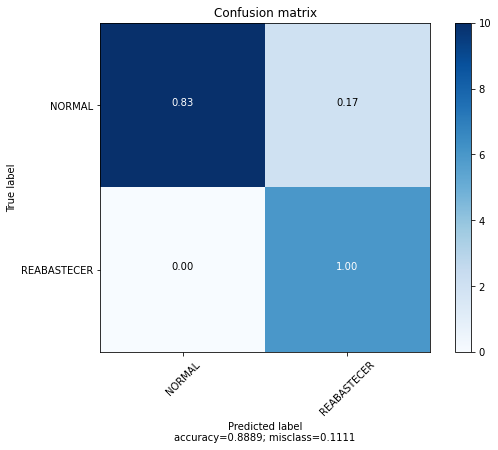

In [265]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])

<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [241]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'teste.csv')
df_to_be_scored.tail()

'wget' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã_Verde,Tangerina,Citrus,Açaí_Guaraná,Pêssego
979,2019-08-23 00:00:00.000000,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-08-24 00:00:00.000000,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-08-25 00:00:00.000000,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-08-26 00:00:00.000000,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-08-27 00:00:00.000000,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


In [242]:
df_to_be_scored = pd.read_csv('teste.csv')
df_to_be_scored.tail()

,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã_Verde,Tangerina,Citrus,Açaí_Guaraná,Pêssego
979,2019-08-23 00:00:00.000000,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-08-24 00:00:00.000000,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-08-25 00:00:00.000000,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-08-26 00:00:00.000000,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-08-27 00:00:00.000000,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "TARGET" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [243]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tempo         984 non-null    object 
 1   Estação       984 non-null    object 
 2   LAT           984 non-null    float64
 3   LONG          984 non-null    float64
 4   Movimentação  984 non-null    int64  
 5   Original_473  984 non-null    int64  
 6   Original_269  984 non-null    int64  
 7   Zero          984 non-null    int64  
 8   Maçã_Verde    984 non-null    int64  
 9   Tangerina     984 non-null    int64  
 10  Citrus        984 non-null    int64  
 11  Açaí_Guaraná  984 non-null    int64  
 12  Pêssego       984 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 100.1+ KB


<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [266]:
# 1 - Removendo linhas com valores NaN
df_to_be_scored.columns = ['Tempo' , 'Estação', 'LAT', 'LONG', 'Movimentação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego']
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)
#3 
#df_to_be_scored_2.tail()
df_to_be_scored_2['data'] = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in df_to_be_scored_2['Tempo']]
df_to_be_scored_2["weekday"] = [t.weekday() for t in df_to_be_scored_2["data"]]



# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=["LAT", "LONG", 'Tempo', 'Movimentação', 'data'], inplace=False)

# 4 - Encoding com "dummy variables" (se necessário)
df_to_be_scored_4 = df_to_be_scored_3
df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Estação'])

df_to_be_scored_4.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,weekday,Estação_Hospital São Paulo,Estação_Moema
979,34,65,28,17,33,27,6,2,4,1,0
980,21,60,18,15,27,22,43,43,5,1,0
981,9,56,13,14,21,17,37,37,6,1,0
982,86,49,7,14,17,12,33,33,0,1,0
983,74,41,65,8,14,7,27,27,1,1,0


<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [267]:
df_training[
    [
        'Original_473', 'Original_269', 'Zero', 
        'Maçã-Verde', 
        'Tangerina',
       'Citrus', 
        'Açaí-Guaraná',
        'Pêssego'
       , 'weekday'
     , 'Estação_Hospital São Paulo'
       , 'Estação_Moema'
     ]
].columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego', 'weekday',
       'Estação_Hospital São Paulo', 'Estação_Moema'],
      dtype='object')

In [268]:
df_to_be_scored_4.columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego', 'weekday',
       'Estação_Hospital São Paulo', 'Estação_Moema'],
      dtype='object')

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [269]:
y_pred = dtc.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,weekday,Estação_Hospital São Paulo,Estação_Moema,TARGET
979,34,65,28,17,33,27,6,2,4,1,0,REABASTECER
980,21,60,18,15,27,22,43,43,5,1,0,NORMAL
981,9,56,13,14,21,17,37,37,6,1,0,REABASTECER
982,86,49,7,14,17,12,33,33,0,1,0,REABASTECER
983,74,41,65,8,14,7,27,27,1,1,0,NORMAL


### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [270]:
#project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))
df_to_be_scored_4.to_csv("results.csv")

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://tnt.maratona.dev
